In [1]:
#KNN
#Data Needs to be scaled like regression algorithms
#Basically distance formula + voting
#Could get computationally expensive if not done correctly
#Working approach, just blindly check every point using distance formula
#Think of better approaches
#Use same dataset as regression

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns 
import sklearn.metrics
import math

In [3]:
infori = pd.read_csv('data/Social_Network_Ads.csv')

In [4]:
infori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(infori[['Age', 'EstimatedSalary']], infori['Purchased'], test_size=0.25, random_state=0)

In [6]:
x_train

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [7]:
ref_cell = x_train.iloc[0]
ref_cell

Age                   44
EstimatedSalary    39000
Name: 250, dtype: int64

In [8]:
dist = x_train[x_train.columns[:2]].apply(lambda x: ((x - ref_cell) ** 2).sum(), axis=1)

In [9]:
x_train

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [10]:
dist.nsmallest(5)

250          0
386         25
200         81
292        121
278    1000064
dtype: int64

In [11]:
def normalise(x):
    return (x - x.mean()) / x.std()
def normalise_all(x_all):
    cpy = pd.DataFrame()
    for col in x_all.columns:
        cpy[col] = normalise(x_all[col])
    return cpy

In [12]:
def get_k_nearest_neighbours(x_tr, y_tr, x, k):
    dist = pd.DataFrame()
    dist['d'] = x_tr.apply(lambda row: ((row - x) ** 2).sum(), axis=1)
    dist['y'] = y_tr
    return dist.nsmallest(k, ['d'], keep='all')['y']

In [13]:
x_act_t = normalise_all(x_train)
x_act_t

,Age,EstimatedSalary
250,0.580679,-0.885228
63,-0.605726,1.459299
312,-0.012523,-0.566835
159,-0.605726,1.893471
283,1.371616,-1.406234
...,...,...
323,0.976147,-1.145731
192,-0.902327,-0.769449
117,-0.210257,-0.508946
47,-1.100061,-0.451056


In [14]:
get_k_nearest_neighbours(x_act_t, y_train, x_test.iloc[0], 5)

211    1
240    1
103    1
168    1
230    1
Name: y, dtype: int64

In [15]:
def classify(x_tr, y_tr, x, k):
    ret = get_k_nearest_neighbours(x_tr, y_tr, x, k)
    return ret.value_counts().keys()[0]

In [16]:
classify(x_act_t, y_train, normalise(x_test.iloc[0]), 5)

0

In [17]:
ypred0 = normalise_all(x_test).apply(lambda row: classify(x_act_t, y_train, row, 5), axis=1)

In [18]:
sklearn.metrics.accuracy_score(y_test, ypred0)

0.93

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
mdl = KNeighborsClassifier()

In [21]:
mdl.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
ypred1 = mdl.predict(x_test)

In [23]:
sklearn.metrics.accuracy_score(y_test, ypred1)

0.83

In [24]:
mdl = KNeighborsClassifier()
mdl.fit(x_act_t, y_train)
ypredg = mdl.predict(normalise_all(x_test))
sklearn.metrics.accuracy_score(y_test, ypredg)

0.93

In [25]:
# Lol exactly the same
# Second run library performs better, maybe the model learns over time?
# Third run ours performs better, some black magic indeed
# Fourth Run Similar performance across all, it's just normalisation

In [26]:
infori = pd.read_csv('data/winequality-red.csv')

In [27]:
x_train, x_test, y_train, y_test = train_test_split(infori[infori.columns[0:11]], infori['quality'], test_size=0.25, random_state=0)

In [28]:
x_act_t = normalise_all(x_train)
x_act_t

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
140,0.035686,1.169651,-0.827626,-0.445166,0.057612,-0.012491,0.459672,-0.136860,-0.770363,0.911572,-0.756285
1232,-0.425017,-0.547120,0.097474,-0.309833,-0.254013,0.270093,0.547912,0.224689,0.590541,-0.106043,-0.850126
720,0.035686,0.161388,-1.187388,-0.377500,-0.108588,-0.577660,-0.746275,0.447998,-0.575948,-1.236726,-0.756285
77,-0.885720,1.387654,-1.392965,-0.106833,0.348462,-0.200881,-0.510968,-0.083691,1.368200,-0.614850,0.275966
39,-0.597781,-0.438119,0.457235,2.261498,-0.274788,-0.389271,1.165593,0.554336,0.136907,0.968106,0.088284
...,...,...,...,...,...,...,...,...,...,...,...
763,0.553977,0.679145,-0.056710,-0.377500,0.182262,-1.048634,-0.363901,0.331027,-0.381533,-1.349794,-0.756285
835,-0.425017,0.733646,-0.879021,-0.715833,-0.440988,1.023652,0.224366,-0.110276,0.525736,-0.840987,-1.037808
1216,-0.252253,0.215889,0.200263,-0.377500,-0.170913,-0.577660,0.930286,0.006696,-0.122313,0.176628,-0.850126
559,2.684730,-0.329118,1.125363,1.178833,-0.046263,-0.954440,-0.010941,2.840602,-0.057508,0.120094,2.152787


In [29]:
ypred0 = normalise_all(x_test).apply(lambda row: classify(x_act_t, y_train, row, 5), axis=1)

In [30]:
sklearn.metrics.accuracy_score(y_test, ypred0)

0.6

In [31]:
mdl = KNeighborsClassifier()

In [32]:
mdl.fit(x_train, y_train)

KNeighborsClassifier()

In [33]:
ypred1 = mdl.predict(x_test)

In [34]:
sklearn.metrics.accuracy_score(y_test, ypred1)

0.47

In [35]:
mdl = KNeighborsClassifier()
mdl.fit(x_act_t, y_train)
ypred2 = mdl.predict(normalise_all(x_test))

In [36]:
sklearn.metrics.accuracy_score(y_test, ypred2)

0.605

In [37]:
# Do elbow plot calc

In [49]:
def all_preds(i_start, i_end):
    return [normalise_all(x_test).apply(lambda row: classify(x_act_t, y_train, row, i), axis=1) for i in range(i_start, i_end)]
    

In [50]:
ypreds = all_preds(1, 20)

In [51]:
def plot_stuff(i_start, i_end, ypreds):
    acrs = [sklearn.metrics.accuracy_score(y_test, yr) for yr in ypreds]
    errrates = [np.mean(ypred_i != y_test) for ypred_i in ypreds]
    fig, ax = plt.subplots()
    ax.plot(range(i_start, i_end), acrs)
    fig, ax = plt.subplots()
    ax.plot(range(i_start, i_end), errrates)

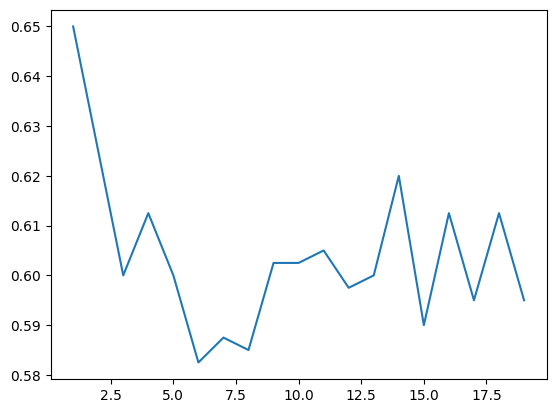

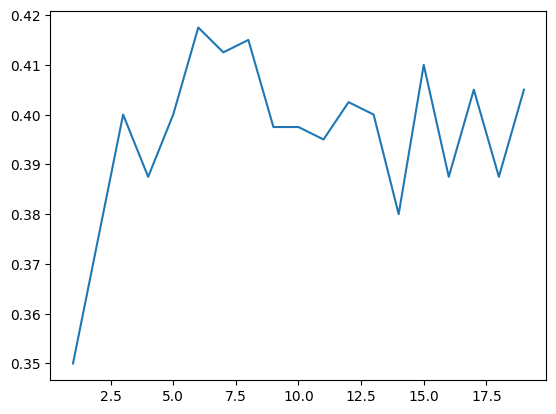

In [52]:
plot_stuff(1, 20, ypreds)

In [53]:
# Do bias and variance plots
# Total Error = bias^2 + var

In [70]:
def plot_other_stuff(i_start, i_end, ypreds):
    bias = [np.sum(y_test - ypred_i) for ypred_i in ypreds]
    vari = [math.sqrt(np.sum((y_test - ypred_i) ** 2)) for ypred_i in ypreds]
    errs = [bi ** 2 + va for bi, va in zip(bias, vari)]
    fig, ax = plt.subplots()
    ax.plot(range(i_start, i_end), bias)
    fig, ax = plt.subplots()
    ax.plot(range(i_start, i_end), vari)
    fig, ax = plt.subplots()
    ax.plot(range(i_start, i_end), errs)

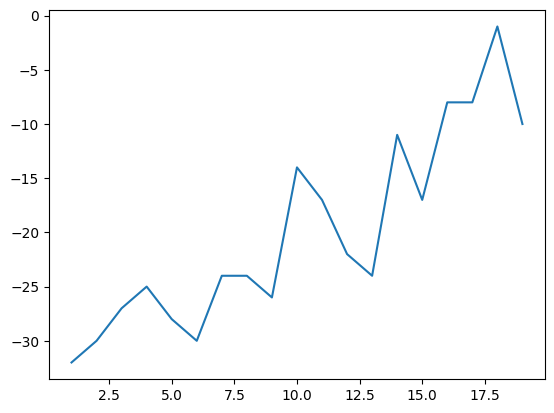

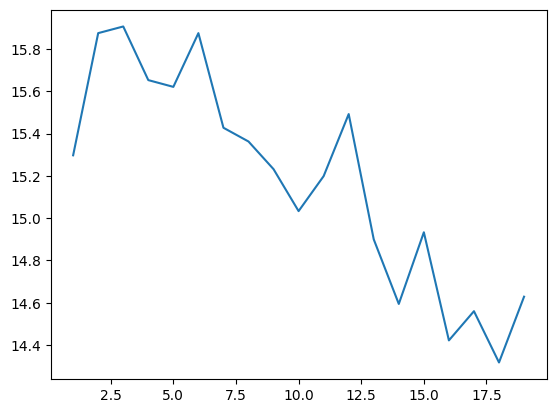

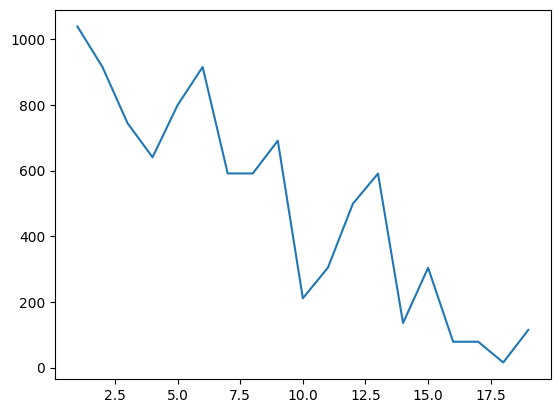

In [71]:
plot_other_stuff(1, 20, ypreds)